# 국민청원 데이터 분석하기

In [1]:
# 출력데이터가 지저분하게 보이지 않도록 warnings을 불러왔다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기위해
import numpy as np
print(pd.__version__)
print(np.__version__)

0.21.0
1.14.0


여기에서는 시각화 도구로 [plotnine(A grammar of graphics for Python)](https://github.com/has2k1/plotnine)을 사용한다.

In [3]:
from plotnine import *

# Pandas로 데이터 살펴보기
* 데이터 출처 : https://github.com/akngs/petitions

In [4]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
petitions = pd.read_csv('data/petition.csv', index_col=0, parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(163600, 7)

## 일부 데이터 미리보기
* 전체 데이터를 한꺼번에 읽어오면 스크롤도 길고 내용이 너무 많기 때문에 일부 데이터만을 본다.
* head()는 윗부분의 데이터 5개를 기본값으로 읽어오고 tail()은 마지막 부분의 데이터를 읽어온다.
* 터미널에서 파일을 미리보기 할 때 사용하는 명령어와 같다.

In [5]:
# head를 통해 상위 몇 개의 데이터만을 본다.
# 기본은 5개를 불러오며, 괄호안에 숫자를 적어주면 숫자만큼 불러온다.
petitions.head(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
# 위에서 불러온 head와 반대로 뒤에서부터 데이터를 읽어온다.
# 터미널에서 크롤링을 하며 tail 파일명으로 크롤링 데이터를 읽었던 기억을 떠올려 보자.
petitions.tail(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
202282,2018-04-16,2018-05-16,0,153,정치개혁,국회의원과 언론사 해외출장 지원 전수조사 요청,언론사 국회의원 전수조사 요청 합니다
202284,2018-04-16,2018-05-16,0,1,교통/건축/국토,건축물들의 주차장 확보법안 및 공사 허가로 인한 피해 보상 마련,옆집 공사로 인해 마당이 가라앉으면서 알게 되었습니다. 공사 허가를 구청에서 하기 ...
202285,2018-04-16,2018-05-16,0,48,경제민주화,청년 사업자와 소상공인의 꿈을 짓밟는 사후 면세점의 사기 행각을 처벌하고 자격 요건...,"안녕하세요, 저는 개인으로 브랜드를 만들어 운영하고 있는 청년 사업자입니다.\n청와..."


In [7]:
# 데이터프레임의 컬럼만을 불러올 수 있다.
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content'], dtype='object')

In [8]:
# 데이터셋의 정보를 볼 수 있다.
# 어떤 컬럼이 있고 몇 개의 데이터가 있으며 어떤 타입인지 볼 수 있다.
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163600 entries, 21 to 202285
Data columns (total 7 columns):
start       163600 non-null datetime64[ns]
end         163600 non-null datetime64[ns]
answered    163600 non-null int64
votes       163600 non-null int64
category    163600 non-null object
title       163600 non-null object
content     163599 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 10.0+ MB


In [9]:
# 숫자로 된 데이터에 대해 count, mean, std, min, max값 등을 볼 수 있다.
petitions.describe()

,answered,votes
count,163600.000000,163600.000000
mean,0.000141,134.796999
std,0.011856,4284.632169
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,0.000000,8.000000
max,1.000000,615354.000000


## 결측치가 있는지 확인

* N/A인 컬럼을 요약해 보여준다.
* 결측치가 있다면 보정이 필요하다. 하지만 이 데이터는 너무나 깔끔하다! 결측치가 없다.
* 하지만 때론, 결측치가 0이나 다른 숫자로 대체해서 들어가 있을 수도 있음으로 데이터를 좀 더 살펴봐야 한다.

In [10]:
petitions.isnull().sum()

start       0
end         0
answered    0
votes       0
category    0
title       0
content     1
dtype: int64

## 사용하지 않는 컬럼 지우기
* 20만건 이상 투표를 받은 청원에 대해 답변을 받기 때문에 답변 여부 컬럼은 사용하지 않는다.
* 만약 데이터 프레임에 이 컬럼이 없다면 수집시 제외했기 때문이다.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [11]:
petitions = petitions.drop(columns=['answered'])
# 답변 받은 컬럼을 제외 시키고 나면 6개의 컬럼이 남는다.
petitions.shape

(163600, 6)

### 답변대상 청원 컬럼 다시 만들기
기존 `answerd`컬럼은 답변 여부가 있었다. 
여기에서는 답변 받은 것과 상관없이 답변 대상 건에 대해 새로운 컬럼을 추가해 주었다.

In [12]:
petitions['answer'] = (petitions['votes'] > 200000) == 1
petitions.shape

(163600, 7)

In [13]:
petitions.head()

,start,end,votes,category,title,content,answer
article_id,,,,,,,
21,2017-08-19,2017-11-17,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False
24,2017-08-19,2017-08-26,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False
25,2017-08-19,2017-09-03,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


### 청원기간 컬럼 생성

In [14]:
petitions['duration'] = petitions['end'] - petitions['start']
petitions.sort_values('duration', ascending=True).head(3)

,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
11874,2017-09-07,2017-09-14,0,교통/건축/국토,서해선 개통,서해선 기공식이 2015년이었던걸로 기억합니다. 왜 아직도 진척이 안되는가 싶네요....,False,7 days
7446,2017-09-05,2017-09-12,0,인권/성평등,청소년법 폐지 청원합니다.,폐지해주세요,False,7 days
7445,2017-09-05,2017-09-12,0,인권/성평등,청소년법 폐지 청원합니다.,폐지해주세요,False,7 days


#### 청원기간별 건

30일이 가장 많고 다음으로 90일, 7일 순이다. 

In [15]:
petitions['duration'].value_counts()

30 days    152400
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: duration, dtype: int64

#### 청원기간이 90일이고 답변 대상 건

In [16]:
petitions.loc[(petitions['duration'] == '90 days') & (petitions['answer'] == 1)]

,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
10949,2017-09-06,2017-12-05,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


#### 청원기간이 60일이고 답변 대상 건

In [17]:
petitions_60_answer = petitions.loc[(petitions['duration'] == '60 days') & (petitions['answer'] == 1)]
print(petitions_60_answer.shape)
petitions_60_answer.head()

(1, 8)


,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
1785,2017-09-03,2017-11-02,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


#### 청원기간이 30일이고 답변 대상 건

In [18]:
petitions_30_answer = petitions.loc[(petitions['duration'] == '30 days') & (petitions['answer'] == 1)]
print(petitions_30_answer.shape)
petitions_30_answer.head()

(30, 8)


,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
18278,2017-09-30,2017-10-30,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days
49083,2017-11-24,2017-12-24,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",True,30 days
57132,2017-12-03,2018-01-02,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,True,30 days


#### 청원기간이 7일이고 답변 대상 건
* 청원기간이 7일인데 답변 대상인 건은 없다.
* 청원기간이 7일인 데이터의 시작 날짜를 그룹화 해보면 청원 초기(2017년 8월 19일~9월 14일)에는 답변 대기 기간이 7일 이었던 것으로 추정된다.

In [19]:
petitions_7_answer = petitions.loc[(petitions['duration'] == '7 days') & (petitions['answer'] == 1)]
print(petitions_7_answer.shape)
petitions_7 = petitions.loc[(petitions['duration'] == '7 days')]
print(petitions_7.shape)
petitions_7_count = petitions_7['start'].value_counts().reset_index()
petitions_7_count.columns = ['start', 'count']
petitions_7_count.sort_values('start', ascending=True)

(0, 8)
(2436, 8)


,start,count
25,2017-08-19,9
22,2017-08-20,18
17,2017-08-21,21
23,2017-08-22,15
16,2017-08-23,22
21,2017-08-24,18
19,2017-08-25,20
20,2017-08-26,19
24,2017-08-27,11
15,2017-08-28,24


## Groupby 메서드 사용하기

https://pandas.pydata.org/pandas-docs/stable/api.html#groupby

## 어느 분야의 청원이 가장 많이 들어왔는지
* pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있다.
* 이 데이터로는 정치개혁과 관련된 국민청원이 가장 많다는 것을 알 수 있다.

In [20]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,29882
1,기타,19754
2,인권/성평등,16451
3,안전/환경,12693
4,육아/교육,12047
5,외교/통일/국방,10248
6,보건복지,9035
7,문화/예술/체육/언론,8489
8,행정,8221
9,미래,7820


## 청원이 얼마 동안 집계되었는지
청원이 가장 많이 들어 온 날은 언제인지 정렬해 본다.

In [21]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 241일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


## 피봇 테이블로 투표를 가장 많이 받은 분야 보기

In [22]:
petitions_unique = pd.pivot_table(petitions, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
petitions_best

,category,answer,votes
0,인권/성평등,7.0,3813151
1,문화/예술/체육/언론,4.0,2527094
2,보건복지,2.0,2159655
3,안전/환경,5.0,2120870
4,정치개혁,3.0,2105910
5,기타,3.0,1842653
6,육아/교육,1.0,1513026
7,외교/통일/국방,1.0,1050310
8,경제민주화,2.0,936941
9,교통/건축/국토,1.0,870237


## 투표를 가장 많이 받은 날

In [23]:
petitions_start = pd.pivot_table(petitions, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000]

,answer,votes
start,,
2018-02-19,1.0,701520
2017-09-06,1.0,648209
2018-02-23,2.0,608530
2017-09-03,1.0,433356
2018-01-20,1.0,399683
2017-11-17,1.0,393348
2017-11-24,1.0,392782
2018-03-24,1.0,385480
2018-03-03,1.0,380016


## 청원을 많이 받은 날 VS 투표를 많이 받은 날

In [24]:
# 두 개의 데이터프레임을 합치기 위해 인덱스를 생성한다.
votes_df = votes_df.reset_index()

In [25]:
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,votes
83,2018-02-19,698,1.0,701520
6,2017-09-06,2121,1.0,648209
23,2018-02-23,1135,2.0,608530
187,2017-09-03,230,1.0,433356
45,2018-01-20,940,1.0,399683


In [26]:
hottest_day_df.sort_values('counts', ascending=False)[:5]

,start,counts,answer,votes
0,2017-11-11,9623,0.0,85074
1,2017-09-05,5952,0.0,48808
2,2018-01-11,3368,0.0,44570
3,2018-02-06,2631,0.0,83038
4,2017-11-09,2487,0.0,34774


## 답변 대상 청원
- 20만건 이상의 투표를 받으면 답변을 받을 수 있는 청원이 된다.

In [27]:
answered_df = petitions.loc[petitions['votes'] > 200000]
print('답변 대상 청원: {}건'.format(answered_df.shape[0]))

답변 대상 청원: 32건


In [28]:
answered_df.head()

,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
1785,2017-09-03,2017-11-02,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
10949,2017-09-06,2017-12-05,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
18278,2017-09-30,2017-10-30,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


### 답변 대상 청원 중 투표를 가장 많이 받은 것

In [29]:
answered_df.sort_values('votes', ascending=False).head(5)

,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
10949,2017-09-06,2017-12-05,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
142600,2018-02-19,2018-03-21,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
105105,2018-01-20,2018-02-19,360905,외교/통일/국방,나경원 의원 평창올림픽 위원직을 파면시켜주세요,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,True,30 days
165796,2018-03-13,2018-04-12,304320,정치개혁,국민들은 정부 개헌안을 지지합니다. 정부의 개헌을 꼭 실현시켜 주십시오.,공약은 중요한 것입니다.\n국민과의 약속입니다.\n대통령님은 공약을 이행해주십시오....,True,30 days
1785,2017-09-03,2017-11-02,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


### 월별 청원이 많이 들어오는 분야

### 월별 투표수가 가장 많은 분야

## 시각화

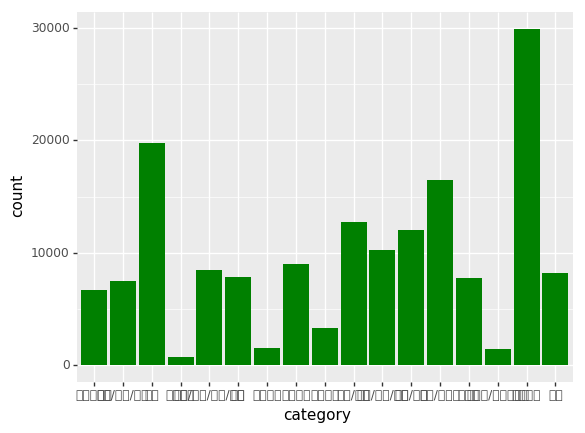

<ggplot: (290959645)>

In [30]:
# 카테고리별로 집계된 데이터를 barplot으로 그려본다.
# 그런데 한글이 깨져보이는 것을 볼 수 있다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
)


#### 한글폰트 사용하기
* 한글이 깨져보이는 것을 해결하기 위해 한글폰트를 사용해야 한다.
* 여기에서는 나눔바른고딕을 사용하도록 한다. 
    * 이때 폰트가 로컬 컴퓨터에 설치되어 있어야한다. 
    * 나눔고딕은 무료로 사용할 수 있는 폰트다. 
    * 참고 : [네이버 나눔글꼴 라이선스](https://help.naver.com/support/contents/contents.nhn?serviceNo=1074&categoryNo=3497)
* 한글을 사용하기 위해서는 ggplot에서 theme에 폰트를 지정해 주면된다.
* 아래의 문서를 참고하면 **element_text**와 관련된 옵션을 볼 수 있다.
* 참고 : [plotnine.themes.element_text — plotnine 0.3.0 documentation](http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html)

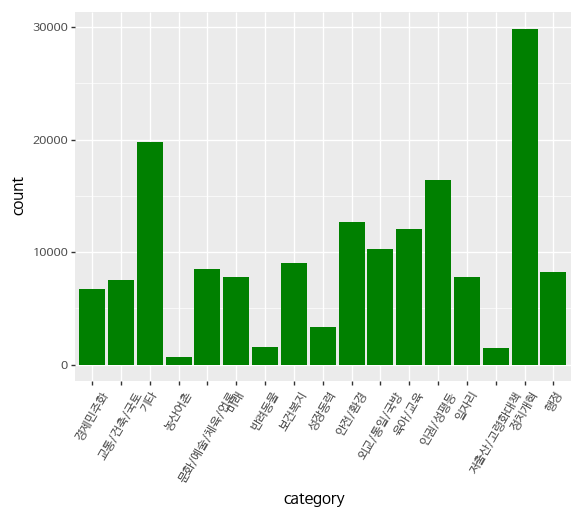

<ggplot: (-9223372036564504253)>

In [31]:
# 글씨가 겹쳐보이지 않도록 rotation도 추가했다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

### 카테고리별 투표수

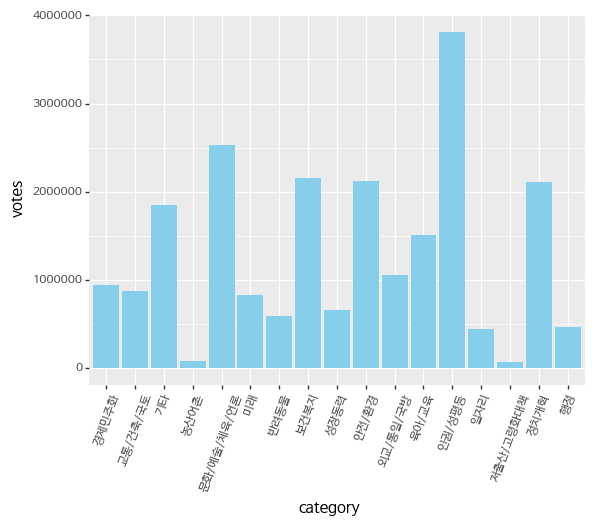

<ggplot: (274468970)>

In [32]:
# 다음으로 투표를 많이 받은 카테고리를 알아본다.
# 인권/성평등에 관련된 청원의 숫자가 가장 많았지만 투표를 가장 많이 받은 청원은 육아/교육이다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

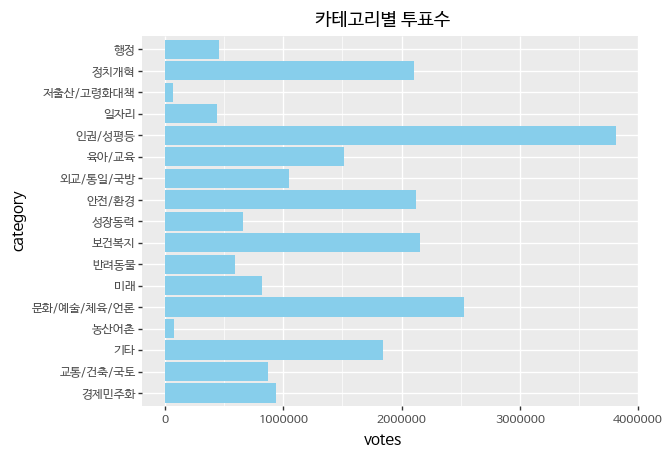

<ggplot: (-9223372036564273548)>

In [33]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

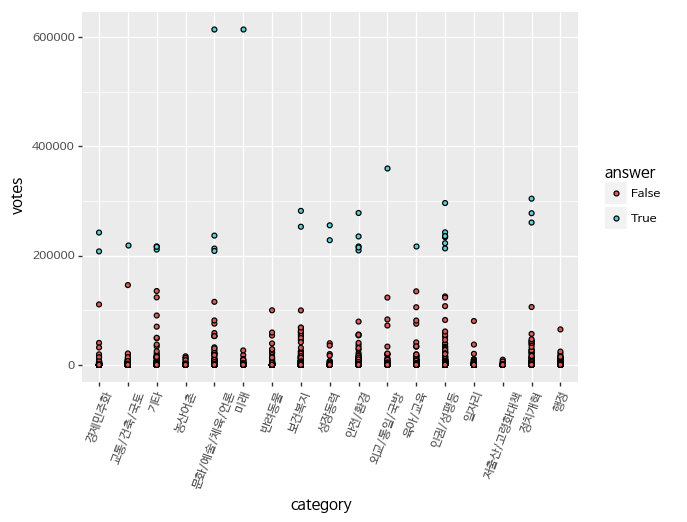

<ggplot: (-9223372036559061525)>

In [34]:
(ggplot(petitions) 
 + aes(x='category', y='votes', fill='answer')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

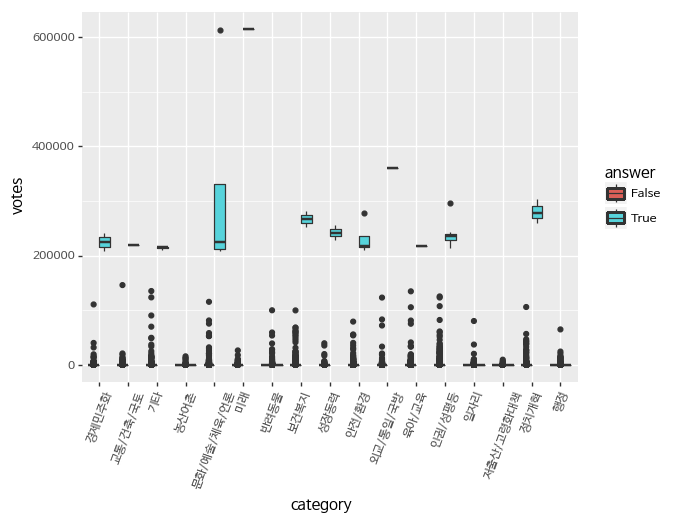

<ggplot: (320714795)>

In [35]:
(ggplot(petitions) 
 + aes(x='category', y='votes', fill='answer')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

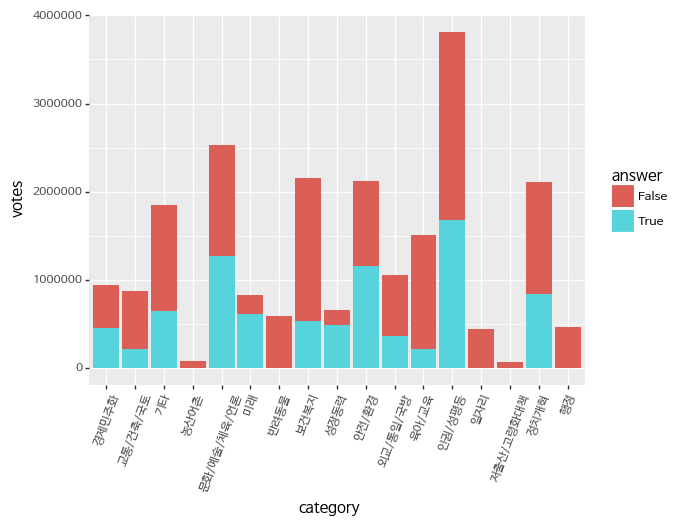

<ggplot: (315511700)>

In [36]:
(ggplot(petitions, aes(x='category', y='votes', fill='answer'))
 + geom_col()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

In [37]:
# 투표를 가장 많이 받은 카테고리인 인권/성평등에서 투표수가 많은 순으로 상위 10개만 본다.
edu = petitions.loc[(petitions['category']=='인권/성평등')]
edu.sort_values('votes', ascending=False)[:10]

,start,end,votes,category,title,content,answer,duration
article_id,,,,,,,,
1785,2017-09-03,2017-11-02,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
148806,2018-02-23,2018-03-25,242687,인권/성평등,조두순 사건의 피해자 가족을 우롱하는 윤서인을 처벌해주십시오,'윤서인'이라는 만화가가 조두순 사건을 인용하여 정치상황을 풍자하는 만화를 그렸는데...,True,30 days
151430,2018-02-26,2018-03-28,235796,인권/성평등,고 장자연의 한맺힌 죽음의 진실을 밝혀주세요.,힘없고 빽없는 사람이\n사회적 영향력 금권 기득권으로\n꽃다운 나이에\n한 많은 ...,True,30 days
18278,2017-09-30,2017-10-30,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
79162,2018-01-03,2018-02-02,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,True,30 days
157046,2018-03-03,2018-04-02,222770,인권/성평등,단역배우 자매 자살 사건 제발 재조사를 해주세여.,http://news.naver.com/main/read.nhn?mode=LSD&m...,True,30 days
81026,2018-01-06,2018-02-05,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,True,30 days
1798,2017-09-03,2017-11-02,125343,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. [소년법]이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 있...,False,60 days
55256,2017-11-30,2017-12-30,123288,인권/성평등,해외 사이트를 기반으로 한 무분별한 일반인 모욕 사진의 유포를 처벌해주세요.,텀블러나 트위터 같은 해외사이트의 경우\n처벌이 어렵다는 이유로\n일반인 여성을 비...,False,30 days


### 시계열 데이터 보기

In [38]:
petitions['start_month'] = petitions['start'].dt.month
petitions['start_day'] = petitions['start'].dt.day
petitions['start_hour'] = petitions['start'].dt.hour
petitions.shape

(163600, 11)

In [39]:
petitions['start_month'].value_counts()

1     31338
11    29473
2     25857
3     21795
12    18456
9     17068
4     12491
10     5951
8      1171
Name: start_month, dtype: int64

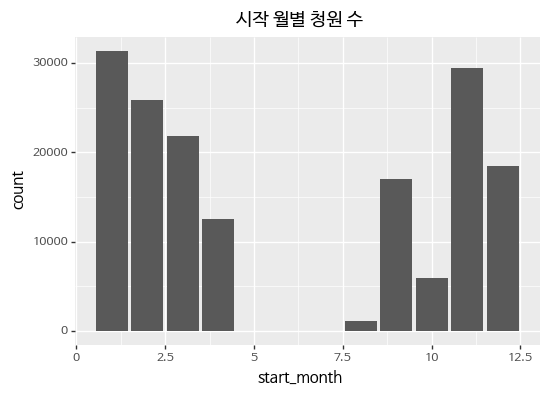

<ggplot: (-9223372036554589240)>

In [40]:
(ggplot(petitions)
 + aes('start_month')
 + geom_bar()
 + ggtitle('시작 월별 청원 수')
 + theme(text=element_text(family='NanumBarunGothic'),  figure_size=(6, 4))
)

In [41]:
start_day = petitions['start_day'].value_counts().reset_index()
start_day.columns = ['start', 'counts']
start_day = start_day.sort_values('start', ascending=True)
start_day[:3]

,start,counts
26,1,3715
25,2,3919
27,3,3606


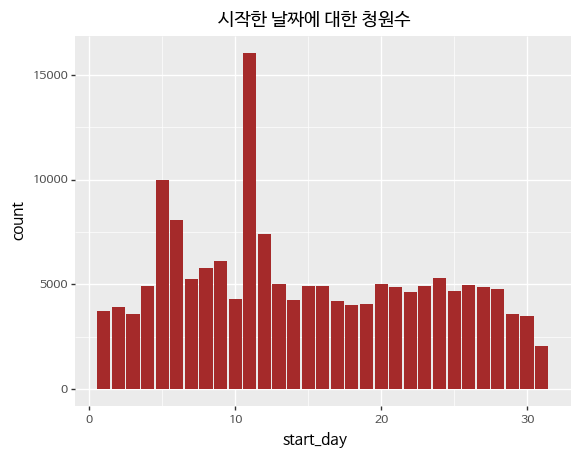

<ggplot: (315997381)>

In [42]:
# 5일과 11일에 청원이 많이 등록되었다.
# 데이터를 보면 5일과 11일에 청원이 많이 등록된다기 보다는 특정 시기에 5일과 11일에 같은 내용의 청원이 많이 들어 온 날이 있다.
# 따라서 날짜에 따라 규칙성을 찾기는 어렵다.
(ggplot(petitions)
 + aes('start_day')
 + geom_bar(fill='brown')
 + ggtitle('시작한 날짜에 대한 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [43]:
# 날짜 데이터에 시간이 없기 때문에 시간은 의미가 없다.
petitions['start_hour'].value_counts()

0    163600
Name: start_hour, dtype: int64

In [44]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('start', ascending=True)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 241일


,start,counts
239,2017-08-19,39
232,2017-08-20,88
230,2017-08-21,89
237,2017-08-22,69
234,2017-08-23,80


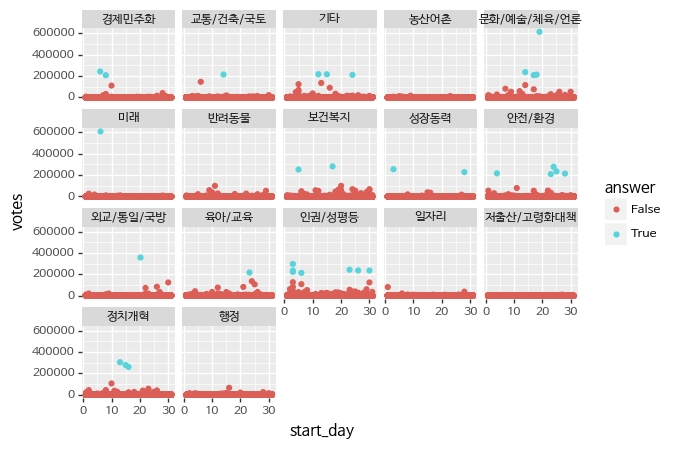

<ggplot: (300402289)>

In [45]:
# 날짜별로 카테고리별 투표수를 본다.
# 20만건 이상 투표를 받아야지만 답변을 받을 수 있다는것을 그래프를 통해 짐작해볼 수 있다.
# 답변을 받지못한 카테고리도 있다.
(ggplot(petitions)
 + aes('start_day', 'votes')
 + aes(color='answer')
 + geom_point()
 + facet_wrap('category')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [46]:
start_ordered_df = petitions['start'].value_counts().index.tolist()
petitions_start_df = CategoricalDtype(categories=start_ordered_df, ordered=True)

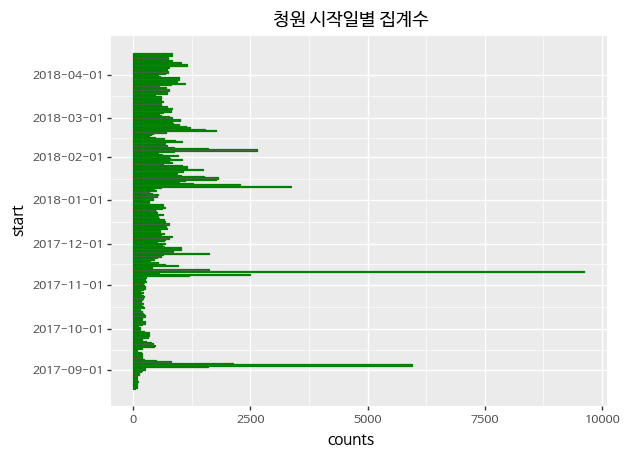

<ggplot: (-9223372036533002636)>

In [47]:
# 특히 청원이 많은 날이 있다. 그날 무슨 이슈가 있었는지 궁금하다.
(ggplot(start_df)
 + aes('start', 'counts')
 + geom_col(color='green')
 + ggtitle('청원 시작일별 집계수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 청원이 많이 등록된 날
- 3천건 이상 청원이 등록된 날 어떤 청원이 있는지 본다.

In [48]:
# 청원이 3000 건이 넘는 날이 있다.
start_df.loc[start_df['counts'] > 3000]

,start,counts
1,2017-09-05,5952
0,2017-11-11,9623
2,2018-01-11,3368


In [49]:
petitions_20170905 = petitions.loc[petitions['start'] == '2017-09-05']
petitions_20170905.head()

,start,end,votes,category,title,content,answer,duration,start_month,start_day,start_hour
article_id,,,,,,,,,,,
3474,2017-09-05,2017-12-04,0,안전/환경,소년법 폐지 죄질은 나이가 없다,소년법 폐지 무서워서 애들을 키울수가 없어요,False,90 days,9,5,0
3475,2017-09-05,2017-12-04,0,인권/성평등,소년법폐지 제발 부탁드립니다,대통령님..부산여중생폭행사건 보셨는지요\n정말 아이를 키우고있는 부모로써 너무나 마...,False,90 days,9,5,0
3476,2017-09-05,2017-12-04,0,인권/성평등,청소년 보호법 폐지,청소년 보호법 폐지,False,90 days,9,5,0
3477,2017-09-05,2017-09-12,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.,False,7 days,9,5,0
3478,2017-09-05,2017-09-12,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.,False,7 days,9,5,0


In [50]:
petitions_20170905['category'].value_counts()

인권/성평등         2202
육아/교육          1105
안전/환경           880
기타              697
미래              436
정치개혁            319
행정              121
보건복지             41
외교/통일/국방         40
일자리              25
교통/건축/국토         25
성장동력             20
문화/예술/체육/언론      13
저출산/고령화대책        10
경제민주화             9
반려동물              7
농산어촌              2
Name: category, dtype: int64

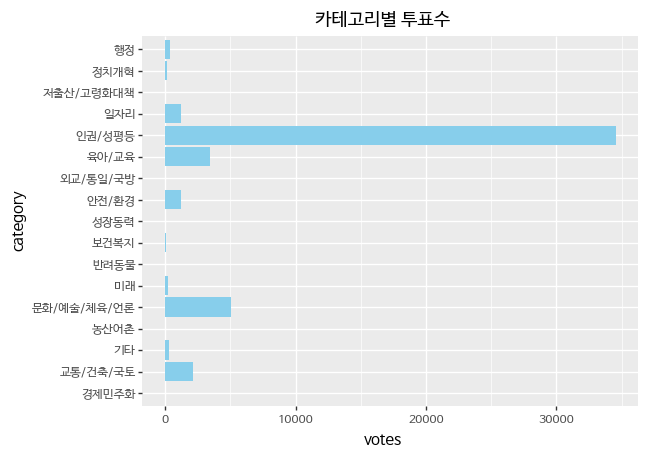

<ggplot: (323305897)>

In [51]:
(ggplot(petitions_20170905)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 정치개혁 분야의 청원이 많이 들어 온 날의 청원 내용보기
- 하지만 투표를 가장 많이 받은 청원은 보건/복지 분야의 청원이다.

In [52]:
petitions_20171111 = petitions.loc[petitions['start'] == '2017-11-11']
petitions_20171111.head()

,start,end,votes,category,title,content,answer,duration,start_month,start_day,start_hour
article_id,,,,,,,,,,,
31383,2017-11-11,2017-12-11,1,정치개혁,이명박 출국금지,이명박 출국금지\n조속한 구속수사,False,30 days,11,11,0
31384,2017-11-11,2017-12-11,3,인권/성평등,조두순 출소 금지,조두순의 출소금지 특별법 제정을 촉구 합니다.,False,30 days,11,11,0
31386,2017-11-11,2017-12-11,39,정치개혁,이명박 출국금지,정의가 바로 선 나라를 만들기 위해 꼭...!,False,30 days,11,11,0
31387,2017-11-11,2017-12-11,2,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,False,30 days,11,11,0
31388,2017-11-11,2017-12-11,1,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,False,30 days,11,11,0


In [53]:
petitions_20171111['category'].value_counts()

정치개혁           7961
기타              865
미래              170
인권/성평등          154
안전/환경           128
외교/통일/국방         61
행정               59
경제민주화            47
육아/교육            46
일자리              25
반려동물             24
보건복지             20
문화/예술/체육/언론      19
교통/건축/국토         16
성장동력             15
저출산/고령화대책         7
농산어촌              6
Name: category, dtype: int64

In [54]:
# 각 데이터의 수를 집계했다. 2017년 11월 11일에 가장 많은 청원이 들어 온 것은 정치개혁이다.
petitions_unique = pd.pivot_table(petitions_20171111, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False)
petitions_best

,answer,start_day,start_hour,start_month,votes
category,,,,,
보건복지,False,220,0,220,58498
인권/성평등,False,1694,0,1694,16338
정치개혁,False,87571,0,87571,5080
외교/통일/국방,False,671,0,671,1924
문화/예술/체육/언론,False,209,0,209,1378
교통/건축/국토,False,176,0,176,976
기타,False,9515,0,9515,461
미래,False,1870,0,1870,132
육아/교육,False,506,0,506,98


In [55]:
# 단어 수
petitions['title_num_words'] = petitions['title'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
petitions['title_num_uniq_words'] = petitions['title'].apply(lambda x: len(set(str(x).split())))

In [56]:
# 단어 수
petitions['content_num_words'] = petitions['content'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
petitions['content_num_uniq_words'] = petitions['content'].apply(lambda x: len(set(str(x).split())))

In [57]:
petitions.head()

,start,end,votes,category,title,content,answer,duration,start_month,start_day,start_hour,title_num_words,title_num_uniq_words,content_num_words,content_num_uniq_words
article_id,,,,,,,,,,,,,,,
21,2017-08-19,2017-11-17,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days,8,19,0,4,4,292,252
22,2017-08-19,2017-11-17,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False,90 days,8,19,0,2,2,67,62
23,2017-08-19,2017-09-03,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days,8,19,0,2,2,118,105
24,2017-08-19,2017-08-26,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False,7 days,8,19,0,4,4,108,101
25,2017-08-19,2017-09-03,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days,8,19,0,2,2,118,105


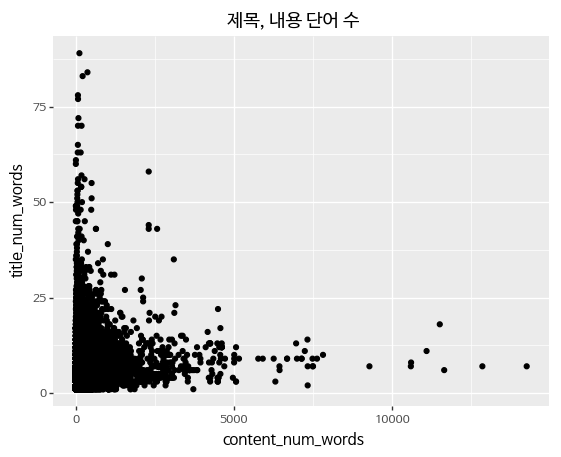

<ggplot: (324781127)>

In [58]:
(ggplot(petitions)
 + aes('title_num_words', 'content_num_words')
 + geom_point()
 + ggtitle('제목, 내용 단어 수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)